<a href="https://colab.research.google.com/github/Zenith1618/Time-Series-Analysis-of-Airplane-Passengers/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 %matplotlib inline

 from matplotlib.pylab import rcParams
 rcParams['figure.figsize'] = 15,6

In [68]:
dataset = pd.read_csv('/content/airline_passengers.csv')


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [70]:
dataset.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [71]:
dataset.dropna(inplace=True)

In [72]:
# Parse the date strings into datetime
from datetime import datetime
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [73]:
indexedDataset.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


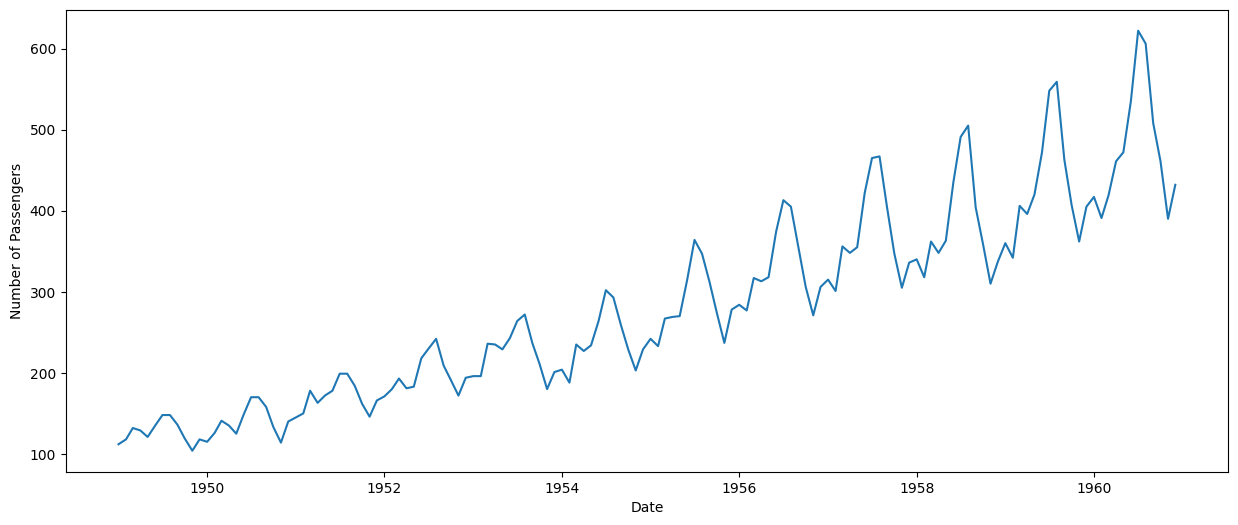

In [74]:
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedDataset)

In [75]:
# To Check the stationarity

rolmean = indexedDataset.rolling(window=12).mean()    # window of yearly level or 12 month
rolstd = indexedDataset.rolling(window=12).std()

print(rolmean, rolstd)

            Thousands of Passengers
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN
...                             ...
1960-08-01               463.333333
1960-09-01               467.083333
1960-10-01               471.583333
1960-11-01               473.916667
1960-12-01               476.166667

[144 rows x 1 columns]             Thousands of Passengers
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN
...                             ...
1960-08-01                83.630500
1960-09-01                84.617276
1960-10-01                82.541954
1960-11-01                79.502382
1960-12-01                77.737125

[144 rows x 1 columns]


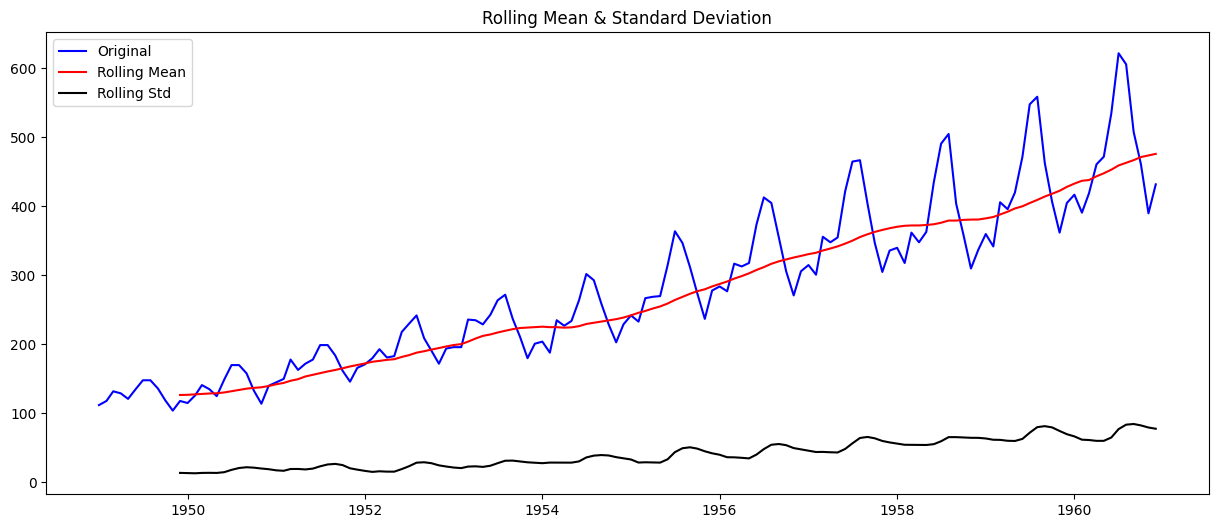

In [76]:
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From this we can say that the data is not stationary, we will verify the same by using Dickey Fuller Test

In [77]:
# Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Thousands of Passengers'], autolag = 'AIC')  # AIC: chi square info

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'No. of observation used'])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics              0.815369
p-value                      0.991880
#Lags Used                  13.000000
No. of observation used    130.000000
Critical Value (1%)         -3.481682
Critical Value (5%)         -2.884042
Critical Value (10%)        -2.578770
dtype: float64


p-value should be always less which is not in this case(around 0.5 is good) and critical value > Test Statistics.


Therefore we cant reject the null hypothesis

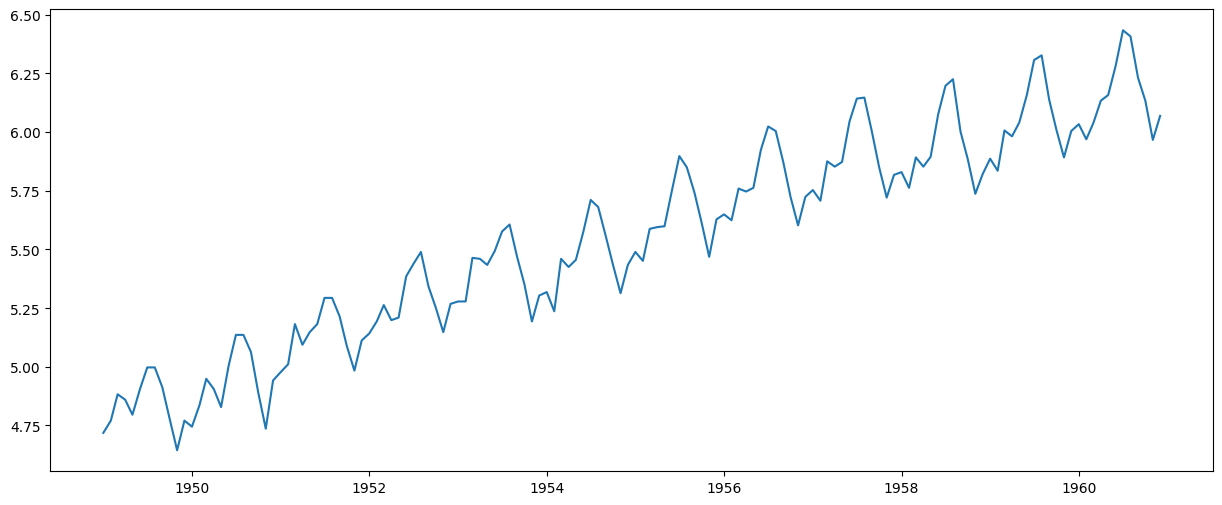

In [109]:
# Estimating the trend

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

The value of y axis has changed but the trend remains the same

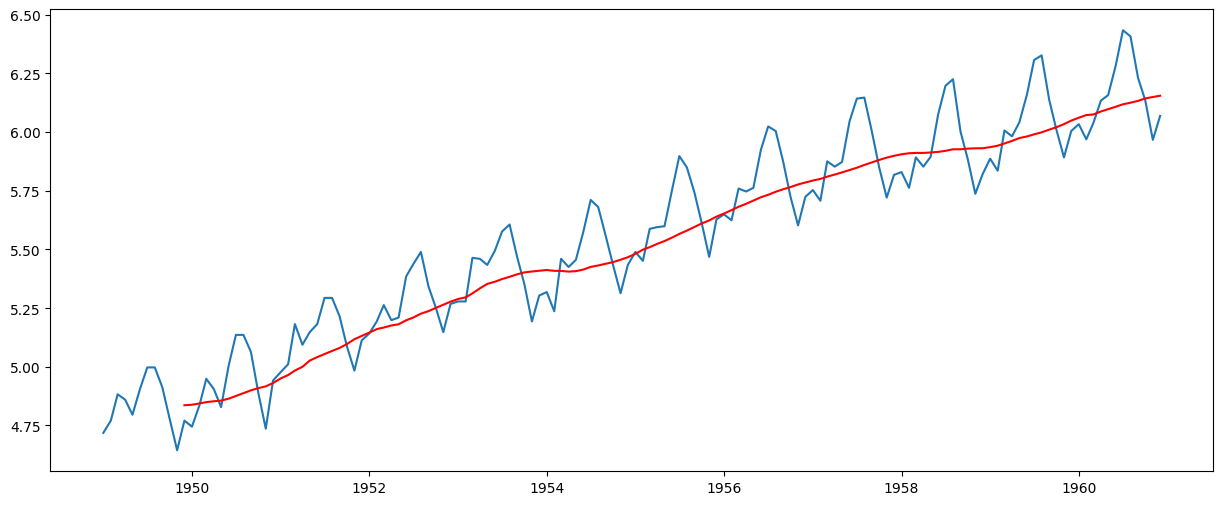

In [79]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()    # window of yearly level or 12 month
movingSTD = indexedDataset_logScale.rolling(window=12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

We can see that mean is not stationary but its quite better than previous time

Using logscale might not always be useful, its totally dependant on the data, like sometimes you might take square root or cube root etc.

In [80]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,Thousands of Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [81]:
# Removing NAN Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

,Thousands of Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [82]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

  movingAverage = timeseries.rolling(window=12).mean()    # window of yearly level or 12 month
  movingSTD = timeseries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
  std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # Perform Dickey-Fuller Test
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Thousands of Passengers'], autolag = 'AIC')  # AIC: chi square info

  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'No. of observation used'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

  print(dfoutput)



In [83]:
def test_stationarity_graph(timeseries):

  movingAverage = timeseries.rolling(window=12).mean()    # window of yearly level or 12 month
  movingSTD = timeseries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
  std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

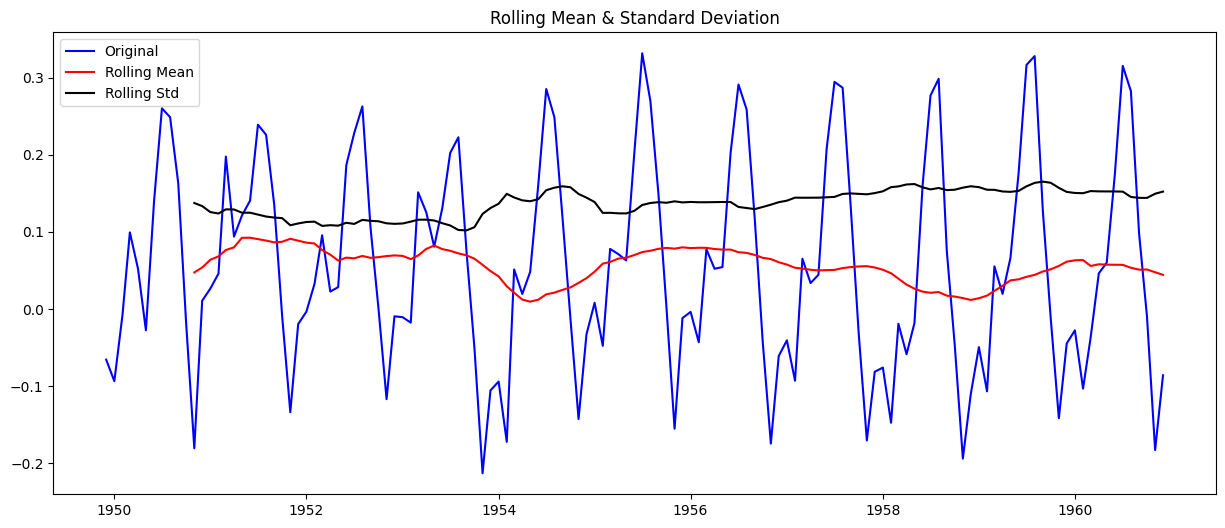

Results of Dickey-Fuller Test:
Test Statistics             -3.162908
p-value                      0.022235
#Lags Used                  13.000000
No. of observation used    119.000000
Critical Value (1%)         -3.486535
Critical Value (5%)         -2.886151
Critical Value (10%)        -2.579896
dtype: float64


In [84]:
test_stationarity(datasetLogScaleMinusMovingAverage)

p-value is less and Test statistics and critical values are almost equal, which means our data is stationary

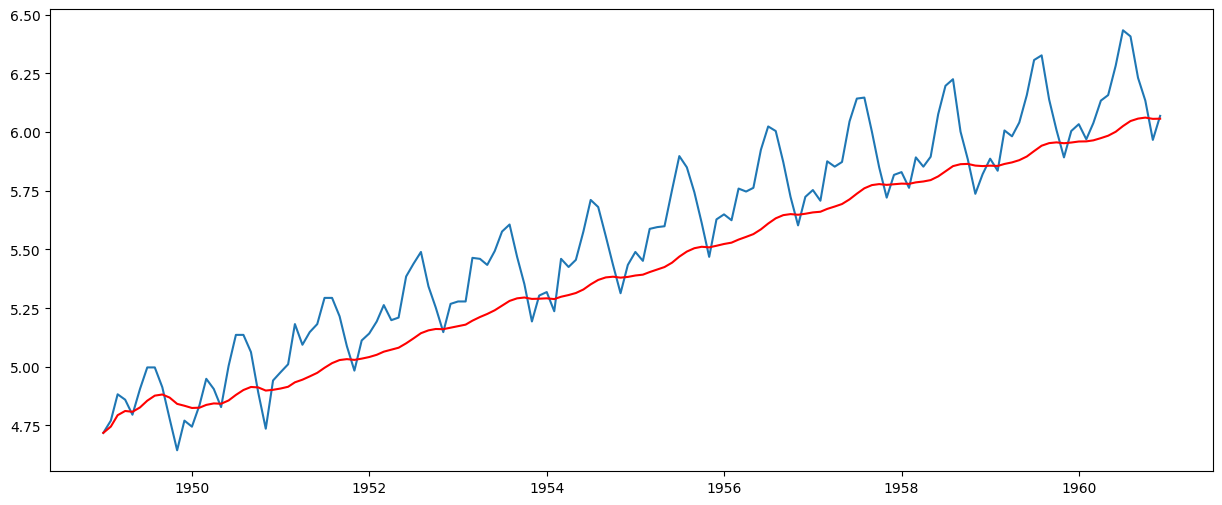

In [85]:
# To see the trend present in the timeseries

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

Here we can see that the trend is upward and it keeps on increasing with time

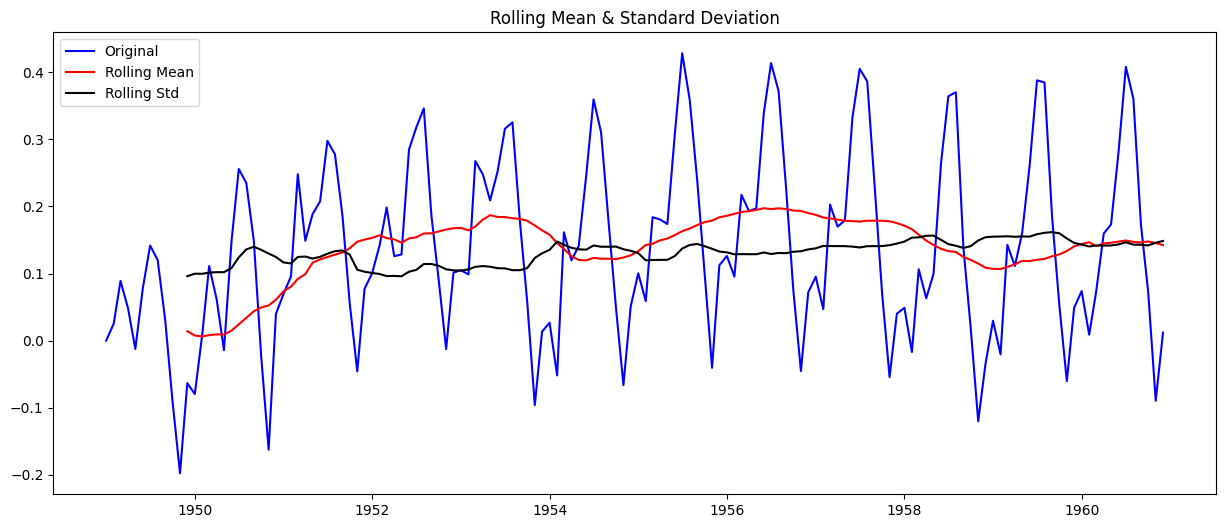

Results of Dickey-Fuller Test:
Test Statistics             -3.601262
p-value                      0.005737
#Lags Used                  13.000000
No. of observation used    130.000000
Critical Value (1%)         -3.481682
Critical Value (5%)         -2.884042
Critical Value (10%)        -2.578770
dtype: float64


In [86]:
datasetLogScaleMinusExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialDecayAverage)

Before we used simple mean and now we are using weighted mean and checking stationarity

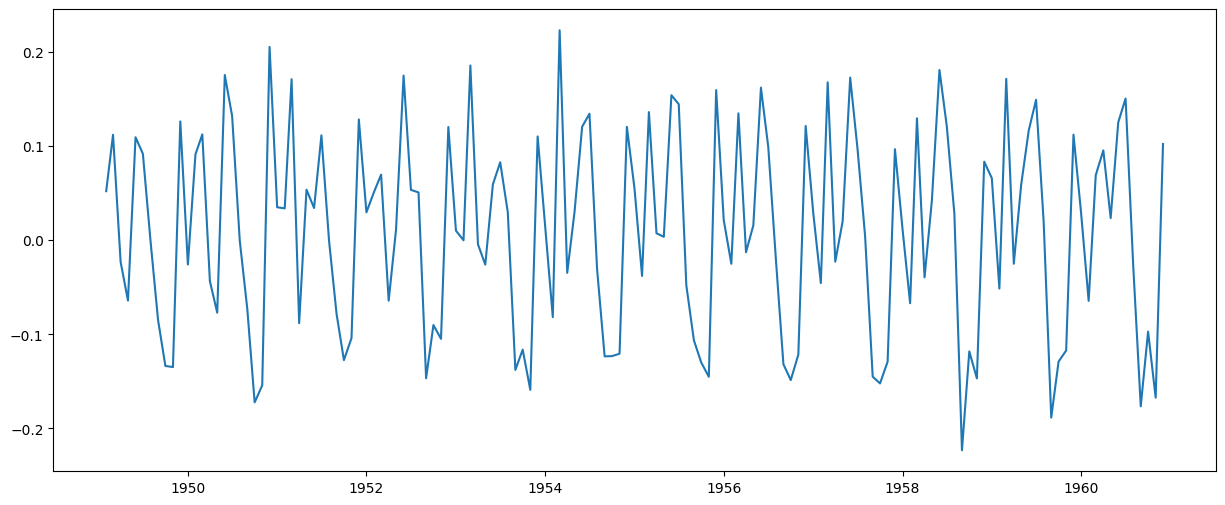

In [87]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

# Here we have taken a lag of 1 or differenced it once

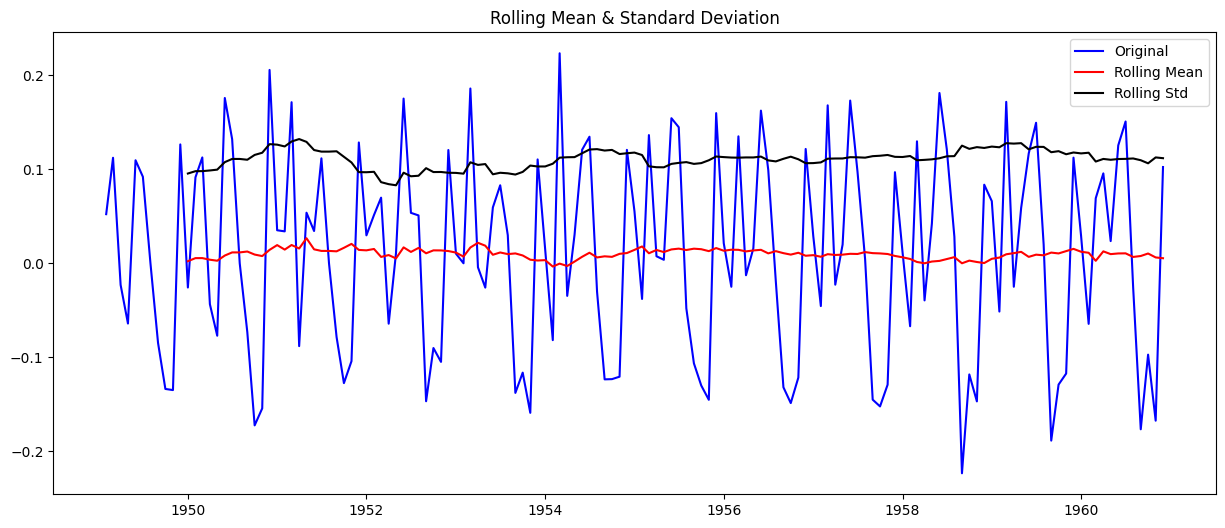

Results of Dickey-Fuller Test:
Test Statistics             -2.717131
p-value                      0.071121
#Lags Used                  14.000000
No. of observation used    128.000000
Critical Value (1%)         -3.482501
Critical Value (5%)         -2.884398
Critical Value (10%)        -2.578960
dtype: float64


In [88]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

From this null hypothesis is rejected. The dataset is stationary now

**Componets of Time Series**

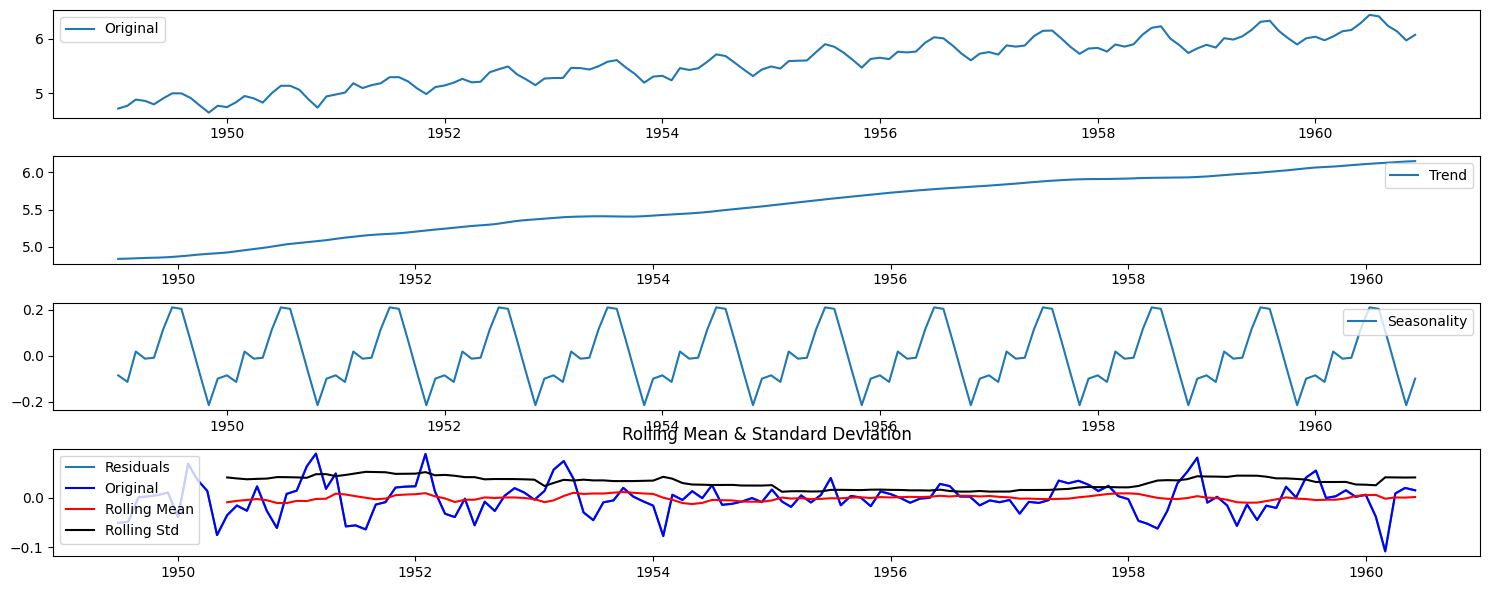

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity_graph(decomposedLogData)


plt.subplot(411), the number 411 is used to specify the layout of subplots in a grid. This is typically used with the matplotlib library in Python for creating multiple subplots within a single figure.

The number 411 is typically broken down into three digits: 4, 1, and 1.

* The first digit (4 in this case) represents the total number of rows in the subplot grid.
* The second digit (1 in this case) represents the total number of columns in the subplot grid.
* The third digit (1 in this case) represents the position or index of the current subplot within the grid, counted row by row from left to right and top to bottom.





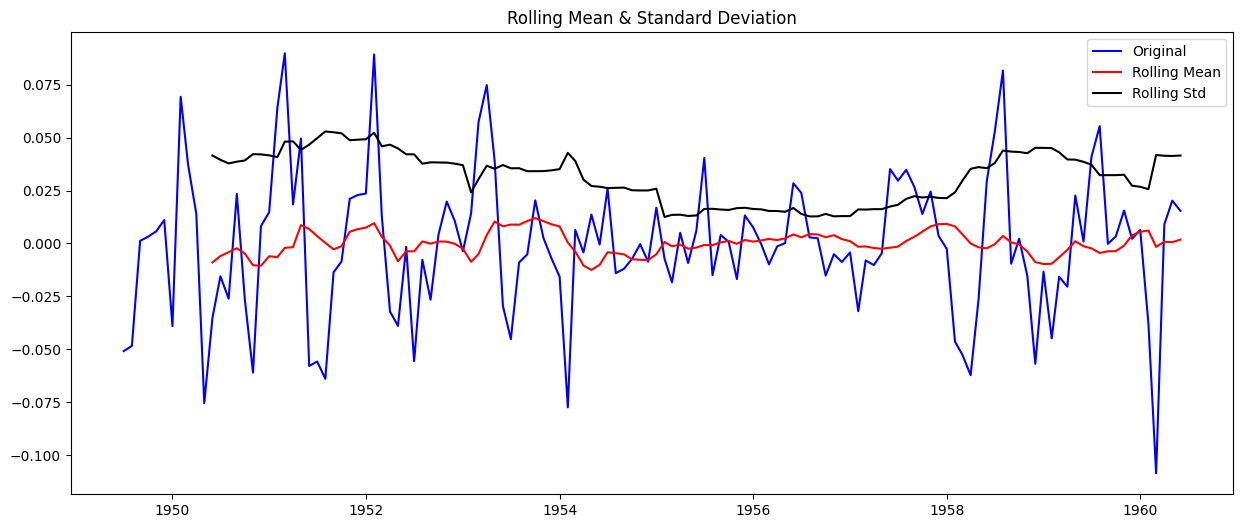

Results of Dickey-Fuller Test:
Test Statistics           -6.332387e+00
p-value                    2.885059e-08
#Lags Used                 9.000000e+00
No. of observation used    1.220000e+02
Critical Value (1%)       -3.485122e+00
Critical Value (5%)       -2.885538e+00
Critical Value (10%)      -2.579569e+00
dtype: float64


In [90]:
# Checking if the irregularities or residual are stationary or not

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity_graph(decomposedLogData)

print('Results of Dickey-Fuller Test:')
dftest = adfuller(decomposedLogData, autolag = 'AIC')  # AIC: chi square info

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'No. of observation used'])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

From this we can say that the residuals are not stationary

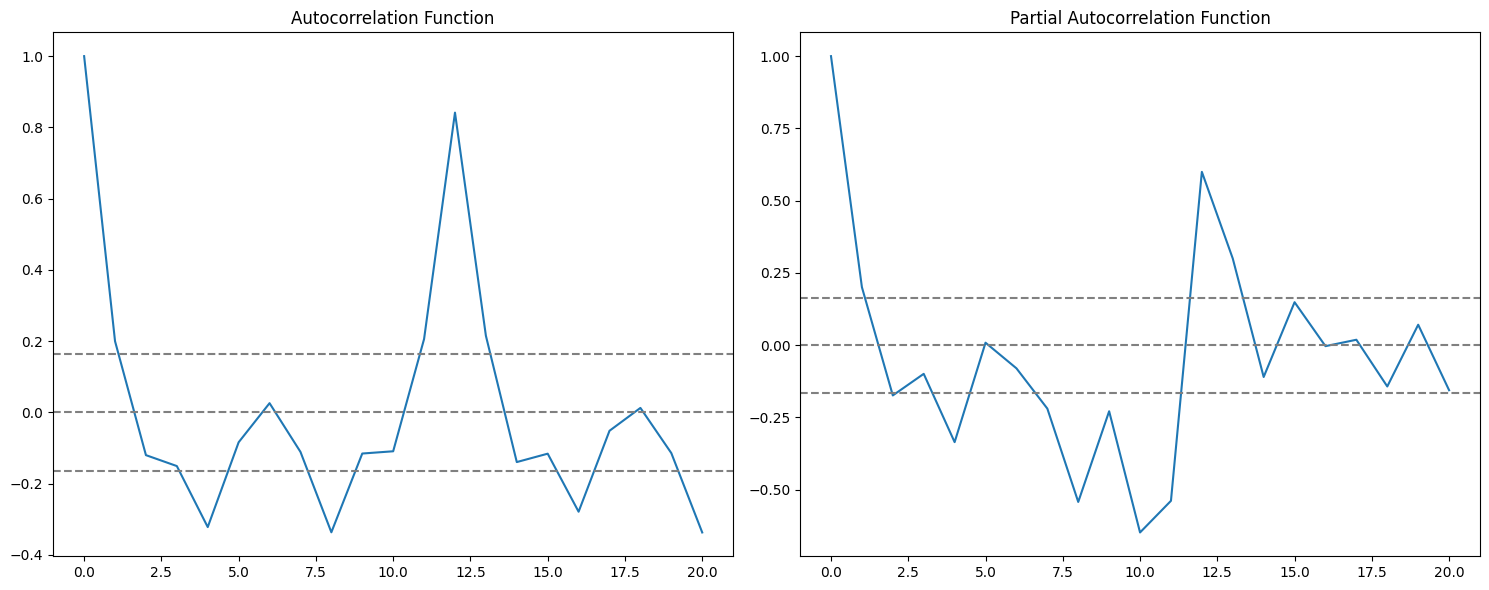

In [91]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols') #ols: ordinary least square method


# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.title('Autocorrelation Function')


# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

we can determine the p and q value from the following graph by looking where the graph cuts the 0 line. So from pacf graph we get the value of p=2 and from acf graph we get the value of q=2.

In [92]:
indexedDataset_logScale

,Thousands of Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [100]:
datasetLogDiffShifting

,Thousands of Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR Model


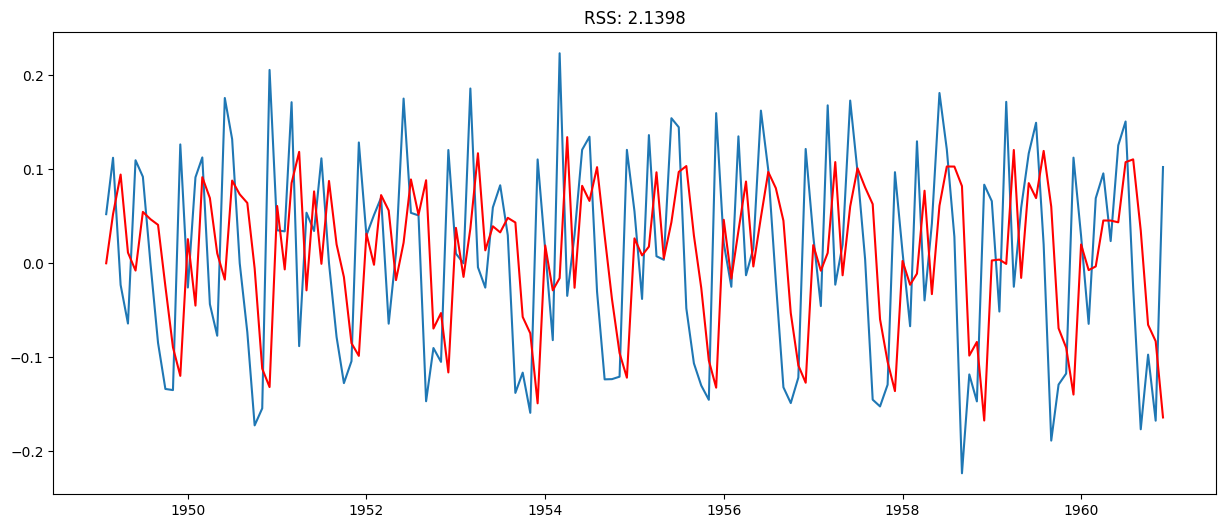

In [121]:
from statsmodels.tsa.arima.model import ARIMA


#AR Model
model = ARIMA(datasetLogDiffShifting, order=(2,1,0))
result_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues - datasetLogDiffShifting['Thousands of Passengers'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA Model


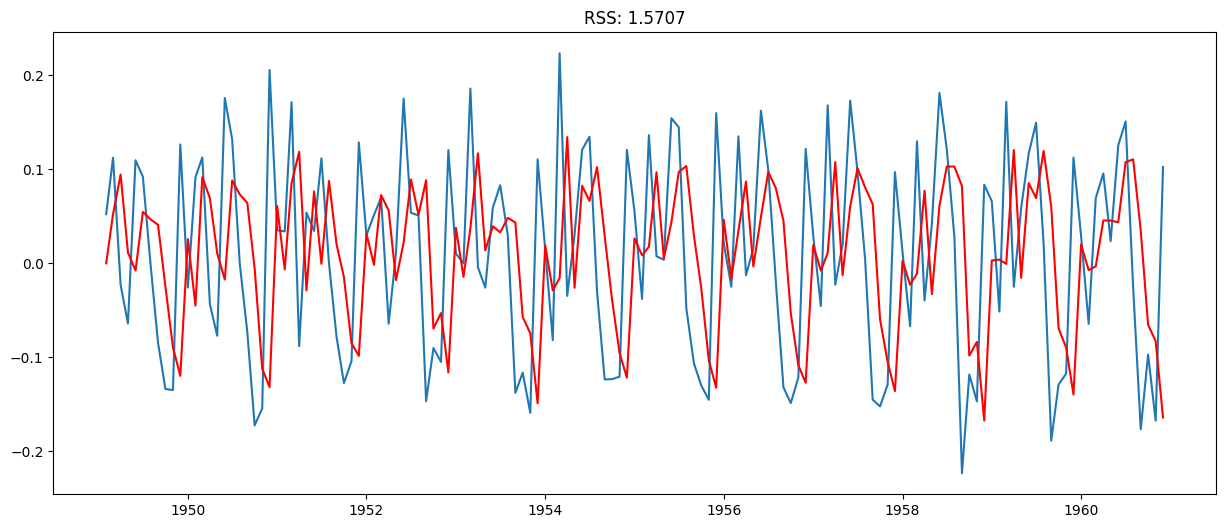

In [112]:
#MA Model
model = ARIMA(datasetLogDiffShifting, order=(0,1,2))
result_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result_MA.fittedvalues - datasetLogDiffShifting['Thousands of Passengers'])**2))
print("Plotting MA Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.5053')

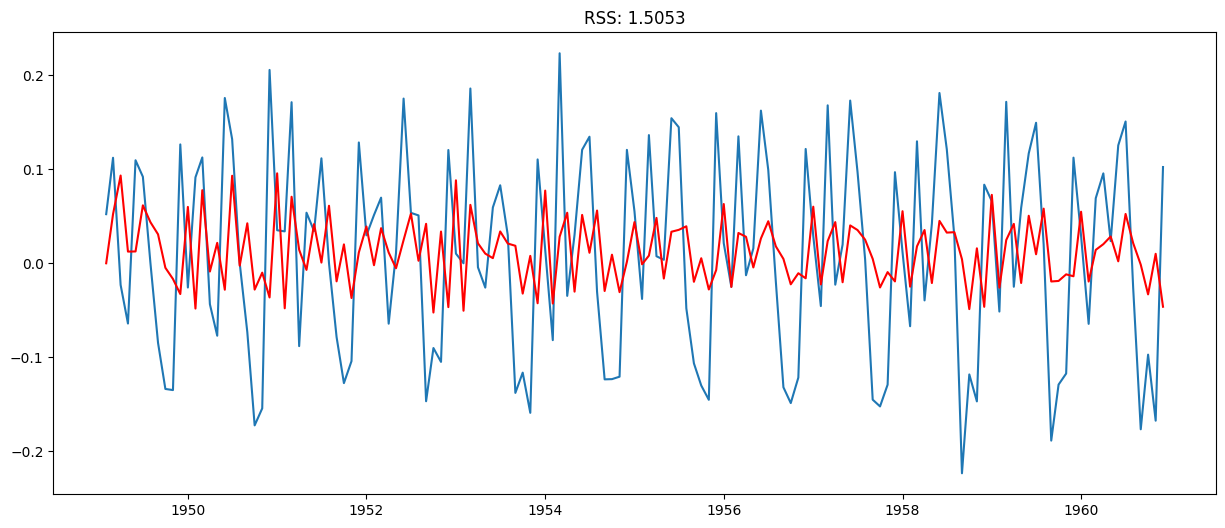

In [133]:
model = ARIMA(datasetLogDiffShifting, order=(2,1,2))
result_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues - datasetLogDiffShifting['Thousands of Passengers'])**2))

In [122]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.093227
1949-05-01    0.012425
1949-06-01    0.012562
dtype: float64


In [148]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.tail())

Month
1960-08-01    1.861768
1960-09-01    1.860294
1960-10-01    1.827252
1960-11-01    1.837312
1960-12-01    1.791141
dtype: float64


In [150]:
# To convert the data to original form
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Thousands of Passengers'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

Month
1960-08-01    8.268648
1960-09-01    8.090775
1960-10-01    7.960650
1960-11-01    7.803459
1960-12-01    7.859566
dtype: float64

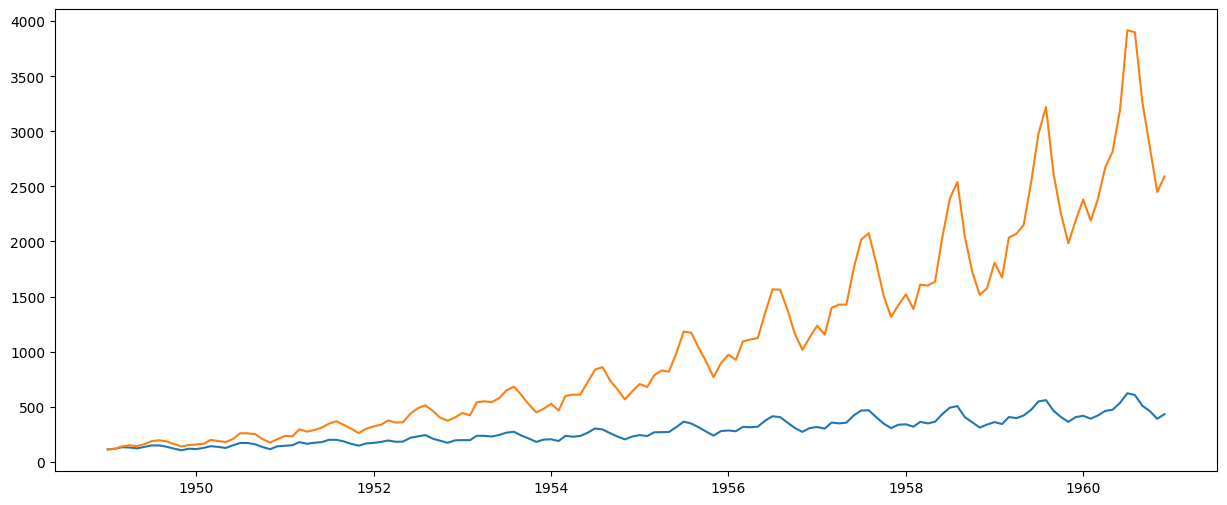

In [152]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

predictions_ARIMA.tail()

plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [153]:
result_ARIMA.plot_predict(1, 264) # 144+120=264


AttributeError: ignored